Predictive Analytics menggunakan Data Weather Type Classification


# Data Loading

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score

In [3]:
# Load data
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nikhil7280/weather-type-classification
!unzip weather-type-classification.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 73.6MB/s]
Archive:  weather-type-classification.zip
  inflating: weather_classification_data.csv  


In [4]:
# Membuat dataset bernama cuaca
cuaca = pd.read_csv('weather_classification_data.csv')
cuaca.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


# Exploratory Data Analysis

In [5]:
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Data yang digunakan berasal dari kaggle dengan judul "Weather Type Classification" yang dapat di unduh [disini](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification).

Variabel yang terdapat pada dataset adalah sebagai berikut:

- `Temperature` (numeric) : Temperatur suhu dalam celcius
- `Humidity` (numeric) : Presentase Kelembaban
- `Wind Speed` (numeric) : Kecepatan angin dalam kilometer/jam
- `Precipitation (%)` (numeric) : Presentase curah hujan
- `Cloud Cover` (categorical) : Deskripsi tutupan awan yang berisi clear, cloudy, overcast dan party cloudy
- `Atmospheric Pressure` (numeric) : Tekanan atmosfer dalam hPa
- `UV index` (numeric) : Indeks UX yang menunjukkan kekuatan radiasi UV
- `Season` (categorical) : Jenis musim mulai dari Autumn, Spring, Summer dan Winter
- `Visibility` (km) (numeric) : Jarak pandang dalam km
- `Location` (categorical) : Lokasi dimana data di ambil seperti coastal, inland dan muntain
- `Weather Type` (categorical) : Jenis cuaca yang berisi Cloudy, Rainy, Snowy dan Sunny (Target Klasifikasi)

Totalnya ada 11 variabel dengan jumlah 13200 data

In [6]:
# Cek nilai duplikat pada data
duplicate_rows = cuaca[cuaca.duplicated()]
print("Jumlah baris duplikat:", duplicate_rows.shape[0])

Jumlah baris duplikat: 0


Berdasarkan hasil pengecekan tidak ditemukan nilai duplikat

In [7]:
# Cek nilai kosong pada data
print(cuaca.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


Berdasarkan pengecekan juga, tidak ditemukan data yang kosong

## Mengubah Type data

In [8]:
# ubah data Weather Type menjadi numerik
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cuaca['Weather Type'] = le.fit_transform(cuaca['Weather Type'])
cuaca.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,1
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,3
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,3
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,1


Mengubah data Weather Type menjadi numerik karena fitur ini akan menjadi target prediksi kita
Mengubahnya menjadi numerik akan mempermudah pengambilan keputusan

0 = Cloudy
1 = Rainy
2 = Snowy
3 = Sunny

In [9]:
# update data
cuaca.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917,1.500000
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499,1.118076
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000,0.750000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000,1.500000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000,2.250000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000,3.000000


In [10]:
# cek data lagi
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.1+ MB


## Univariate Analysis

Univariate Analysis adalah jenis analisis data yang memeriksa satu variabel saja. Tujuannya uuntuk menggambarkan data dan menemukan pola distribusi data

Sebelum mulai analysis kita bagi datanya menjadi 2 bagian, yakni `numerical_fitur` untuk data numerik dan `categorical_features` untuk data kategorik

In [11]:
# bagi menjadi 2 fitur
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)', 'Weather Type']
categorical_features = ['Cloud Cover', 'Season', 'Location']


### Categorical Features

               jumlah sampel  persentase
Cloud Cover                             
overcast                6090        46.1
partly cloudy           4560        34.5
clear                   2139        16.2
cloudy                   411         3.1


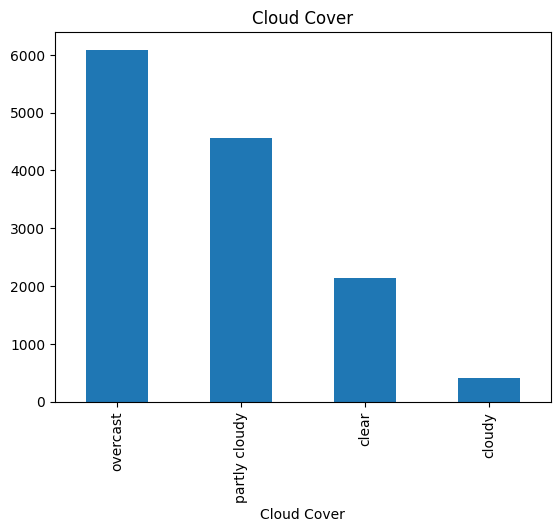

In [12]:
# Fitur CLoud Cover
feature = categorical_features[0]
count = cuaca[feature].value_counts()
percent = 100*cuaca[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik pada fitur `Cloud Cover` di atas:
- `overcast` memiliki 6090 data
- `party cloud` memiliki 4560 data
- `clear` memiliki 2139 data
- `cloudy` memiliki 411 data

        jumlah sampel  persentase
Season                           
Winter           5610        42.5
Spring           2598        19.7
Autumn           2500        18.9
Summer           2492        18.9


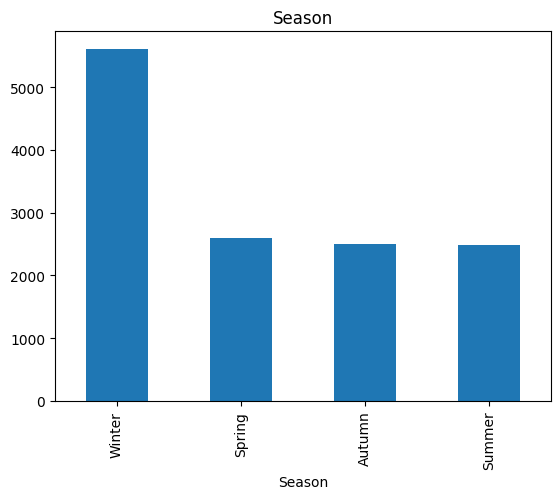

In [13]:
# Fitur Season
feature = categorical_features[1]
count = cuaca[feature].value_counts()
percent = 100*cuaca[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik pada fitur `Season` di atas:
- `winter` memiliki 5610 data
- `Spring` memiliki 2598 data
- `Autumn` memiliki 2500 data
- `Summer` memiliki 2492 data

          jumlah sampel  persentase
Location                           
inland             4816        36.5
mountain           4813        36.5
coastal            3571        27.1


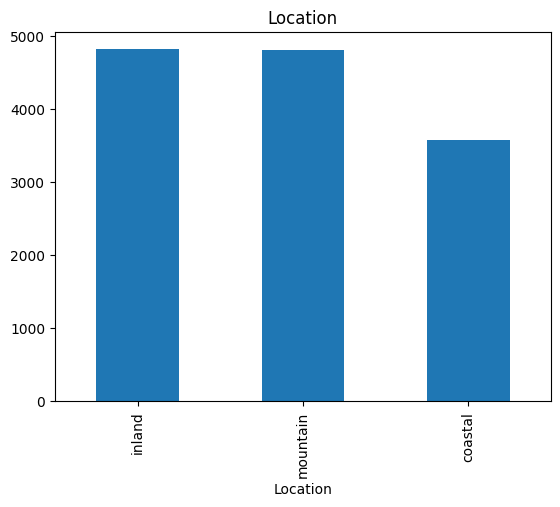

In [14]:
# Fitur Location
feature = categorical_features[2]
count = cuaca[feature].value_counts()
percent = 100*cuaca[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik pada fitur `Location` di atas:
- `inland` memiliki 4816 data
- `mountain` memiliki 4813 data
- `coastal` memiliki 3571 data

### Numerical Features

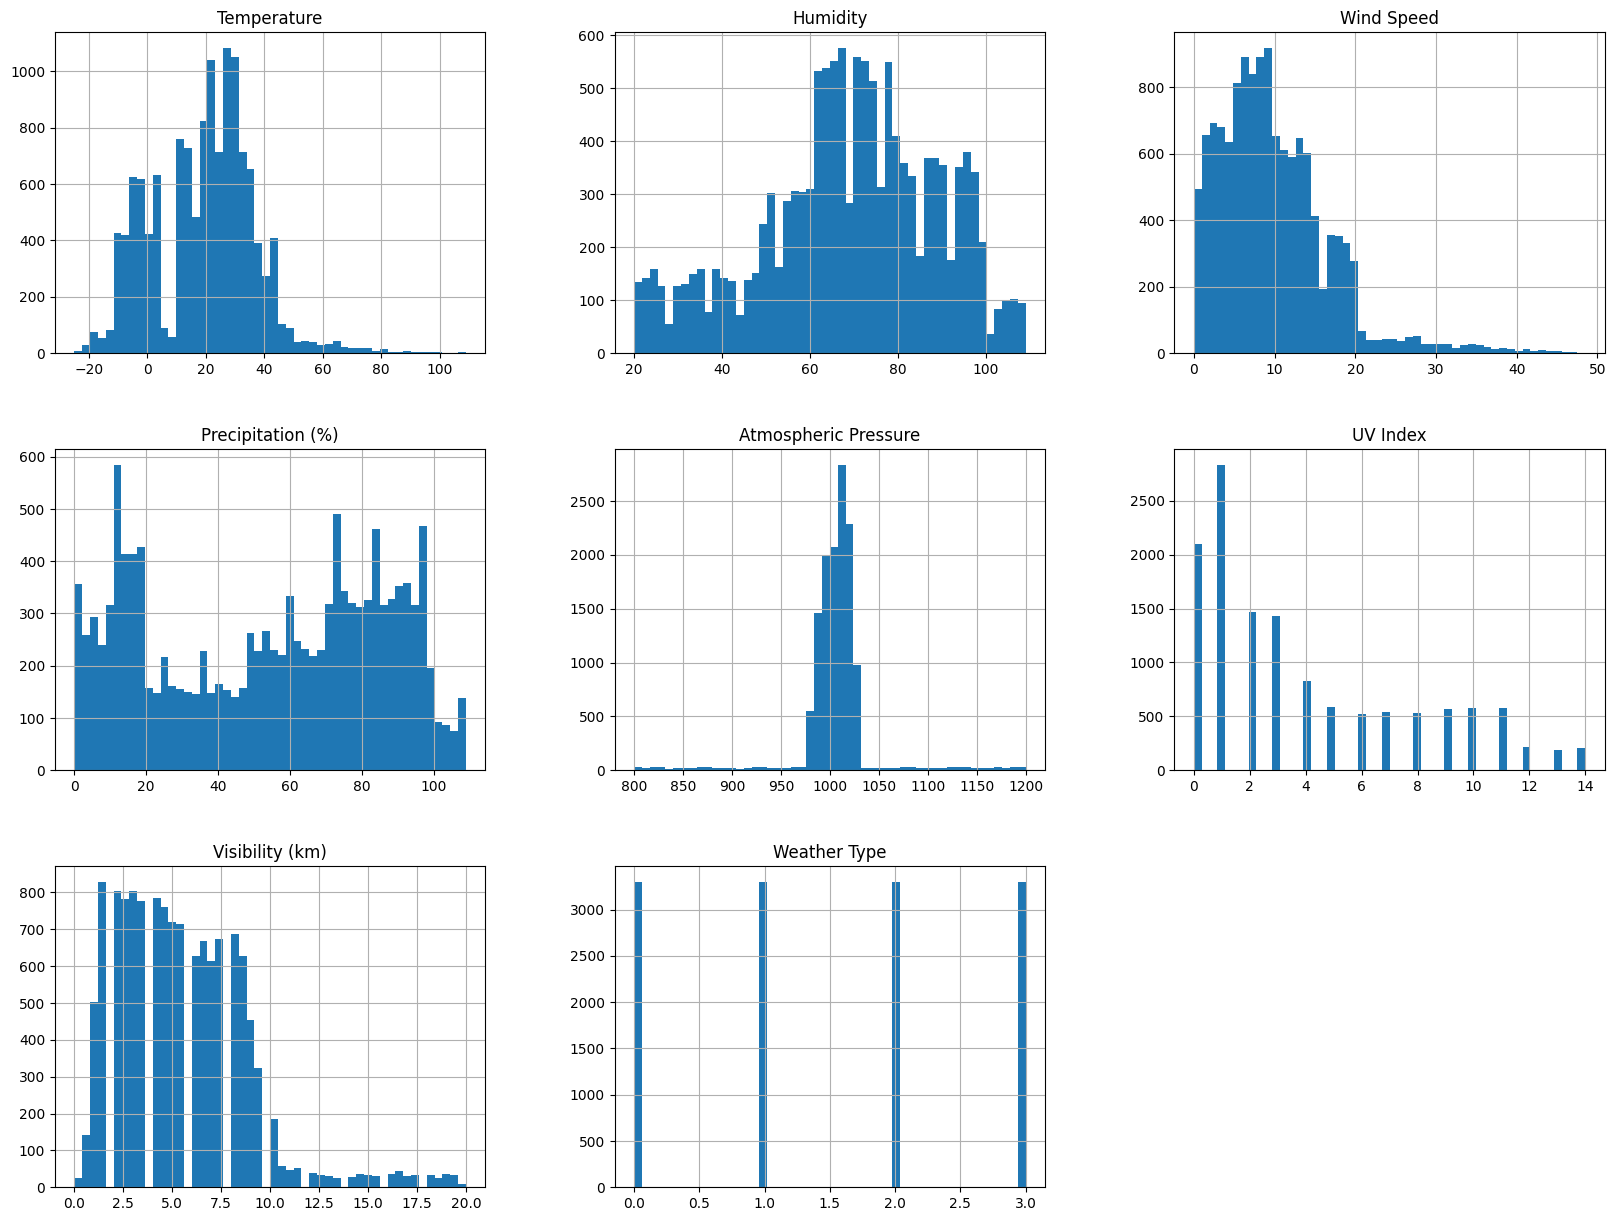

In [15]:
cuaca.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan grafik diatas, hampir semmua kolom skewnessnya mengarah ke kiri kecuali `Humidity` dan `Atmospheric Pressure`. Sedangkan untuk `Weather Type` datanya terlihat seimbang

## Multivariate Analysis

Multivariate Analysis menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate Analysis yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate Analysis. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik.

### Categorical Features



<ipython-input-16-f62e079941a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Weather Type", kind="bar", dodge=False, height = 4, aspect = 3,  data=cuaca, palette="Set3")
<ipython-input-16-f62e079941a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Weather Type", kind="bar", dodge=False, height = 4, aspect = 3,  data=cuaca, palette="Set3")
<ipython-input-16-f62e079941a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Weather Type", kind="bar", dodge=False, height = 4, aspect = 3,  data=cuaca, palette="Se

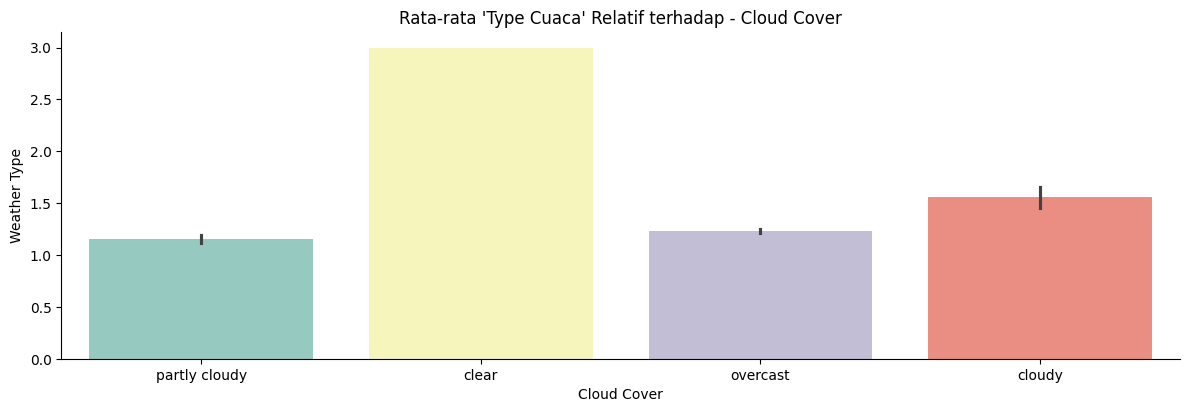

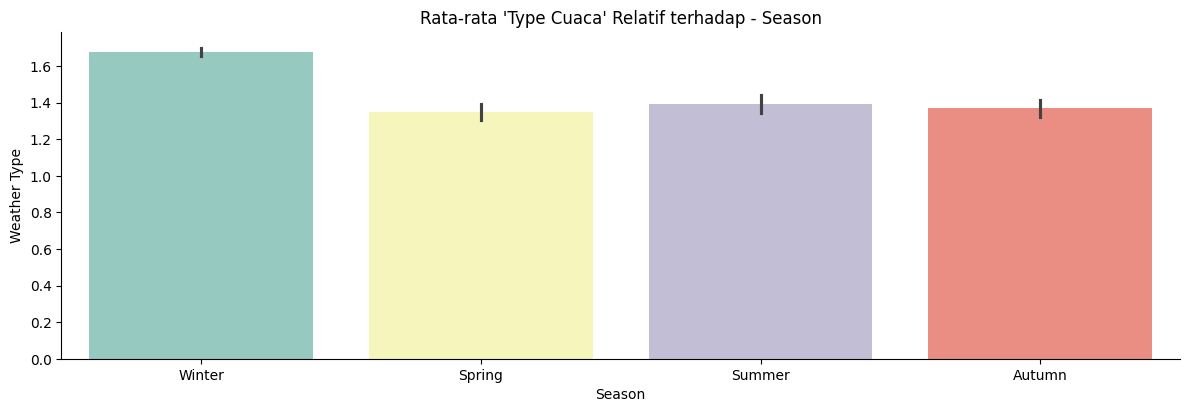

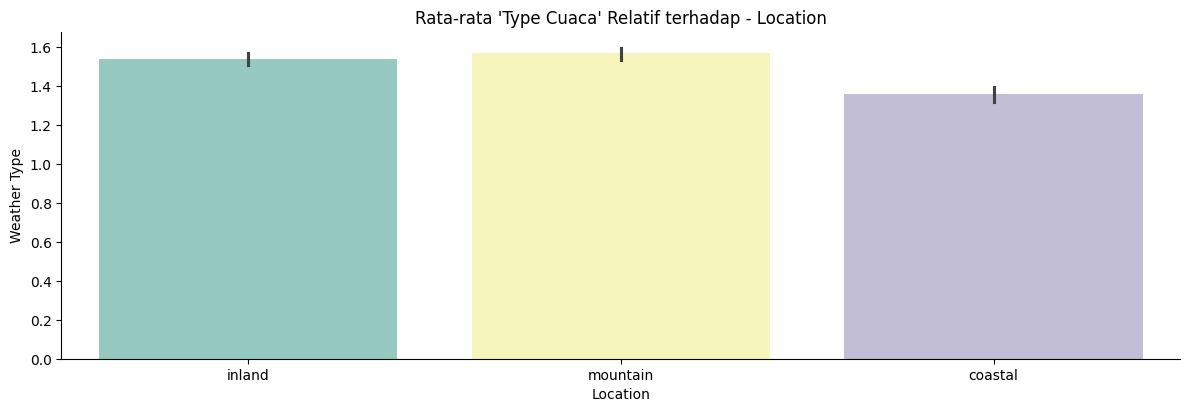

In [16]:
cat_features = cuaca.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Weather Type", kind="bar", dodge=False, height = 4, aspect = 3,  data=cuaca, palette="Set3")
  plt.title("Rata-rata 'Type Cuaca' Relatif terhadap - {}".format(col))

berdasarkan data grafik di atas:
1. Pada fitur 'Cloud Cover', ada perbedaan signifikan pada kategori clear yang menandakan adanya hubungan antara 'Cloud Cover' dengan 'Weather Type'
2. Pada fitur 'Season', rata-rata Tipe cuaca yang muncul hampir sama di kisaran 1,2 - 1,6 menandakan hubungan 'Season' dengan 'Weather Type' rendah
3. Pada fitur 'Location', rata-rata Tipe cuaca yang juga hampir mirip. Ini juga menandakan rendahnya hubungan antara fitur 'Location' dan 'Weather Type'



### Numerical Features

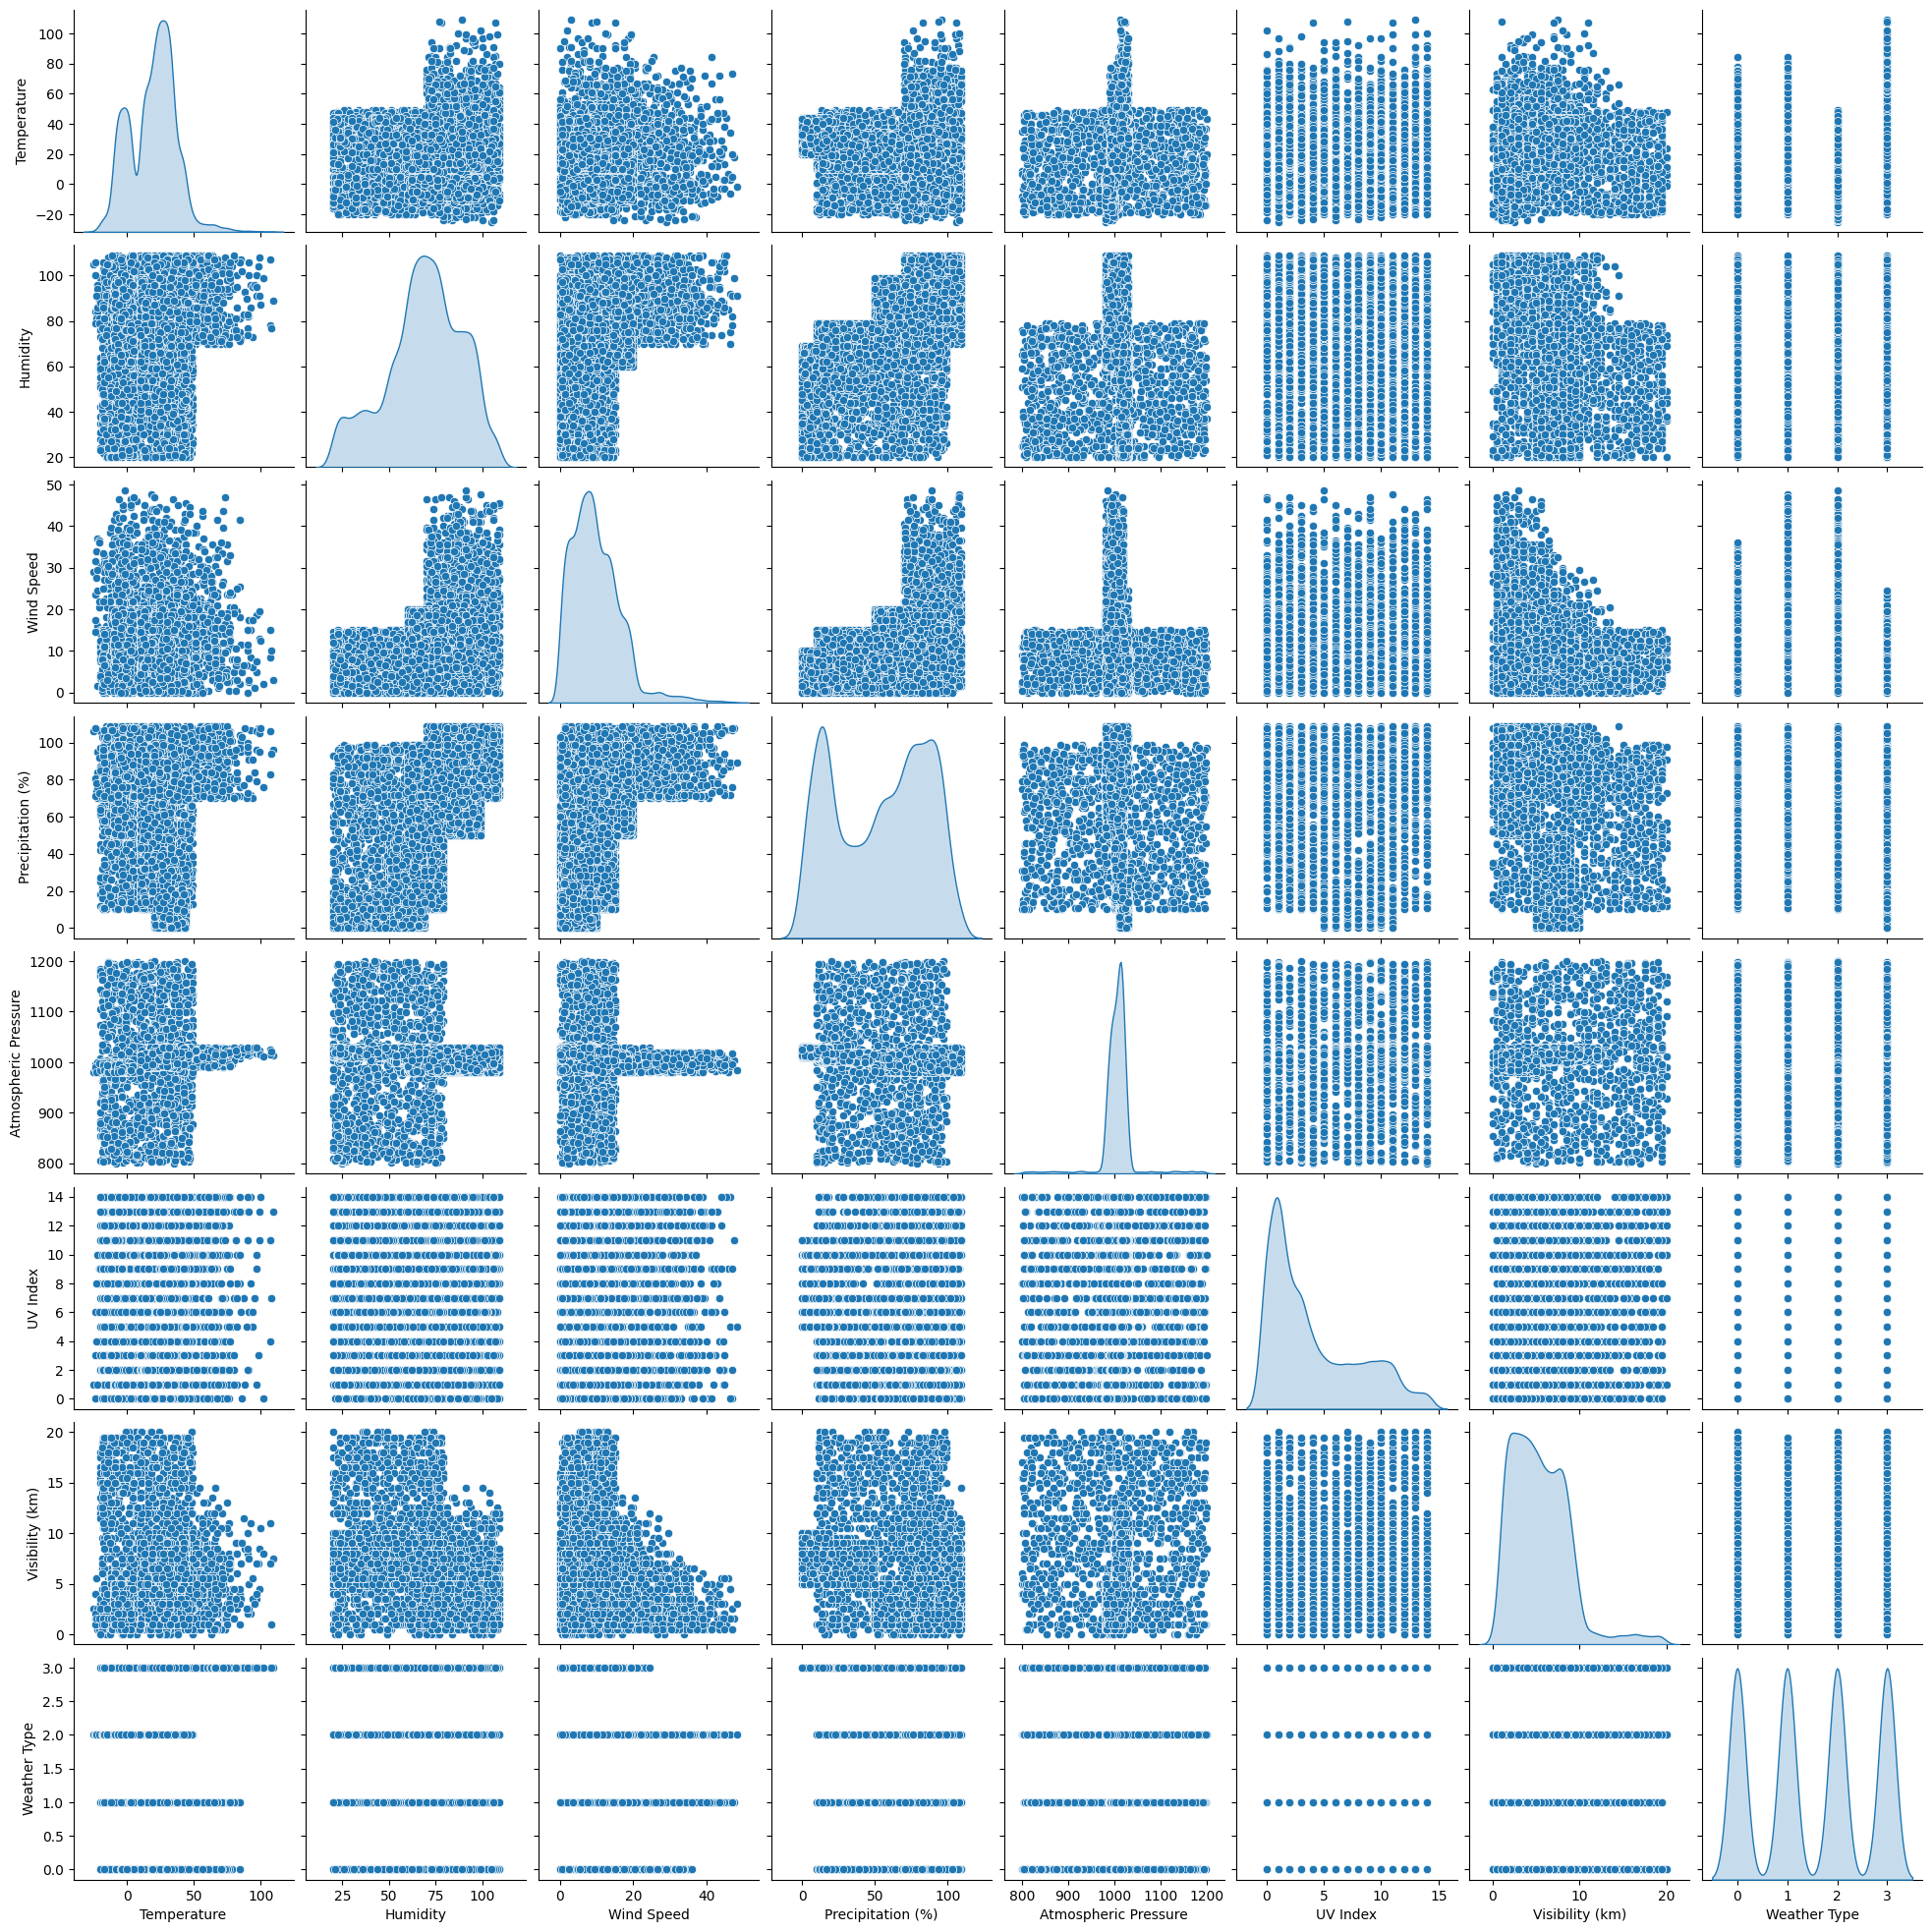

In [17]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(cuaca, diag_kind = 'kde')

Berdasarkan visualisasi data diatas, tidak terlihat adanya hubungan yang signifikan antara fitur dengan target `Weather Type`

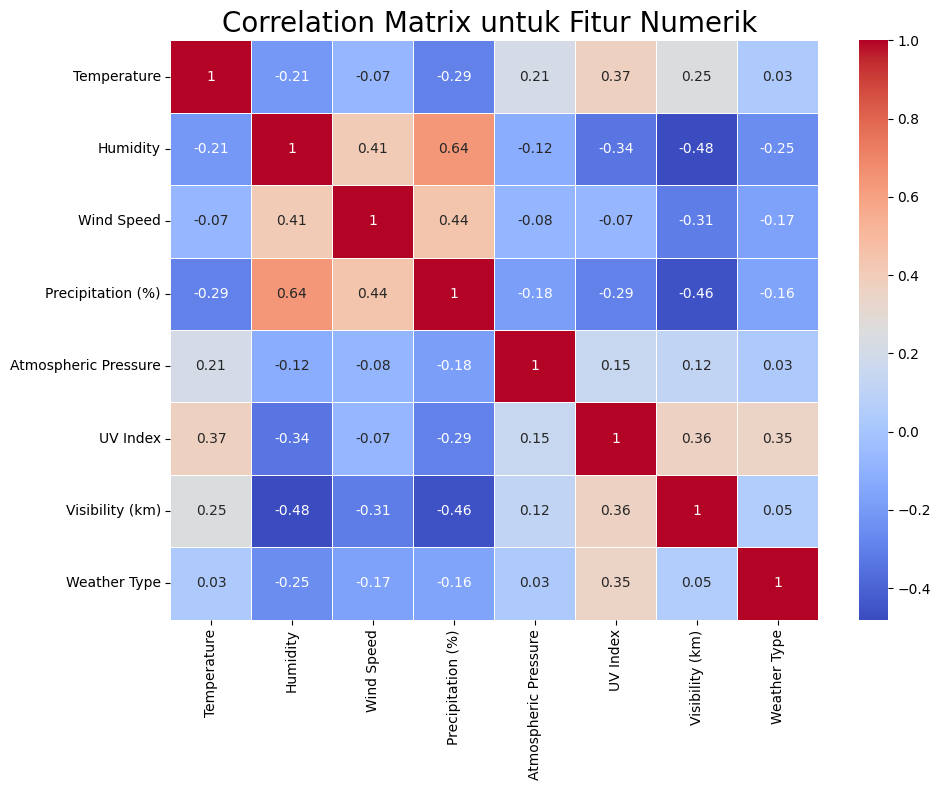

In [18]:
# Mengetahui skor korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = cuaca[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.tight_layout()

Berdasarkan nilai korelasi di atas
- `Temperature`, `Atmospheric Pressure` dan `Visibilty (km)` adalah fitur yang mempunyai nilai korelasi paling kecil dengan target `Weather Type` dan akan di hapus

# Data Preparation

Data preparation merupakan tahapan penting dalam proses pengembangan model machine learning. Ini adalah tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

## Menangani Outliers


Outlier adalah titik data yang secara signifikan berada di sebgaian data dalam kumpulan data. Outlier ini bisa muncul karena banyak faktor salah satunya adalah kesalahan pengamatan.

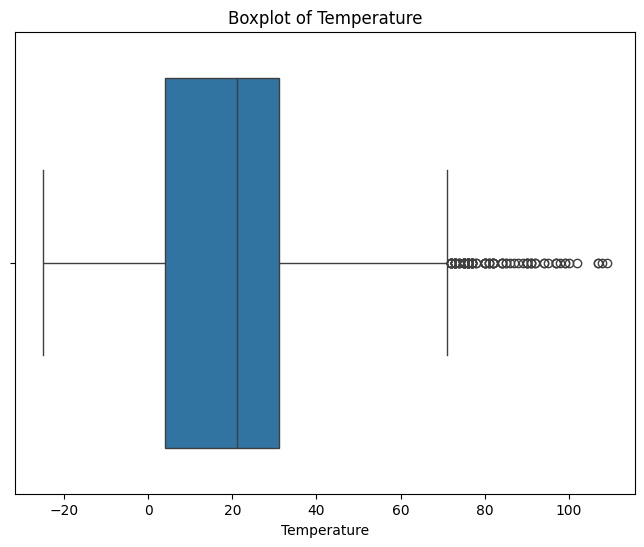

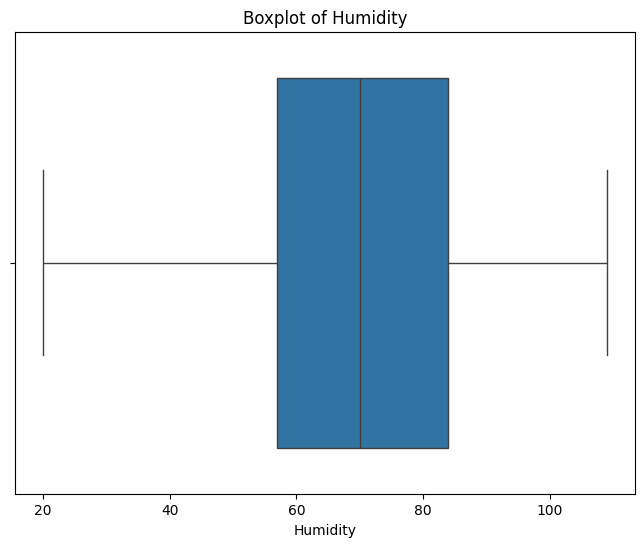

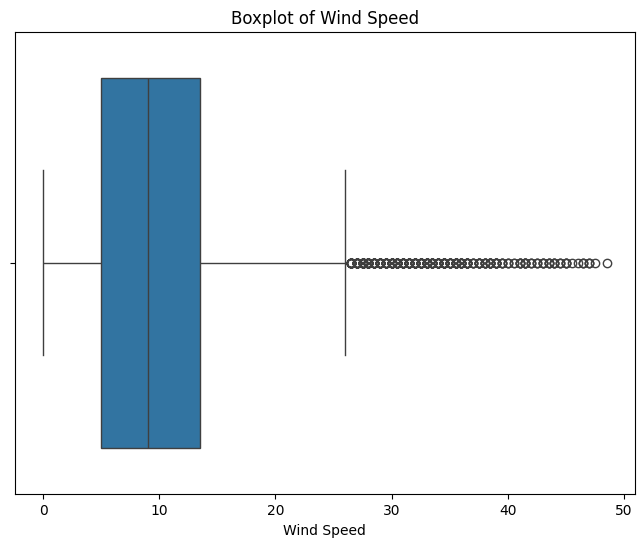

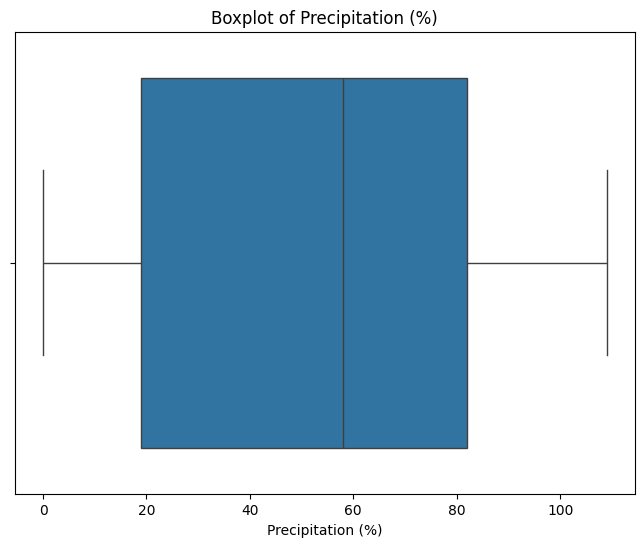

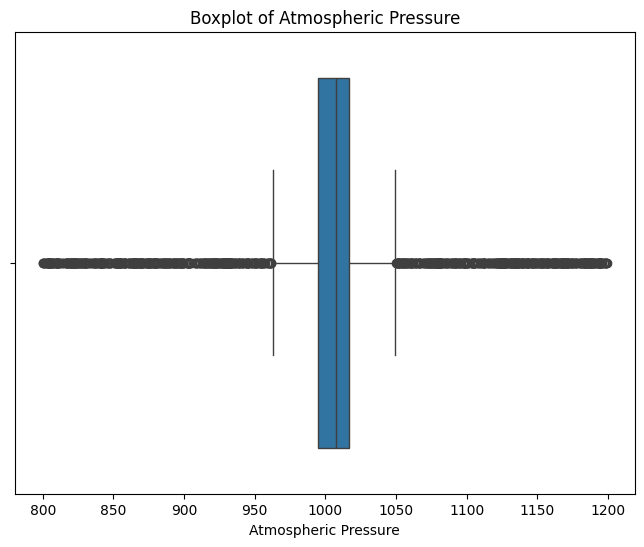

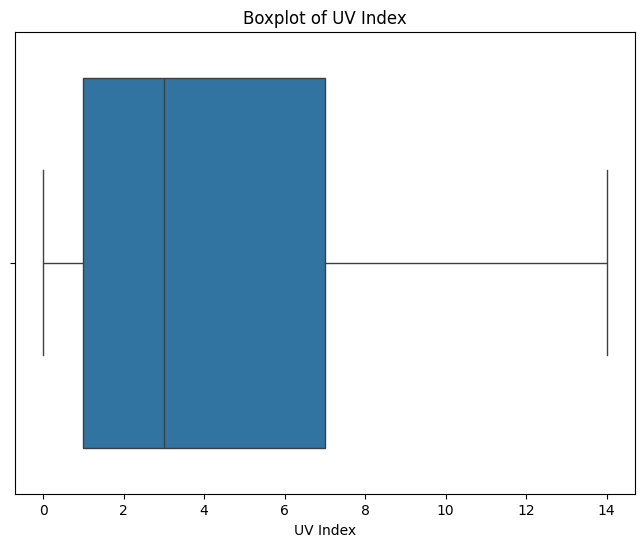

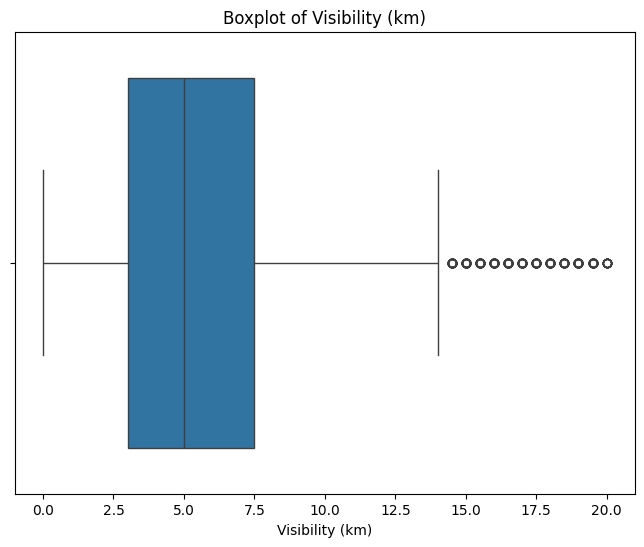

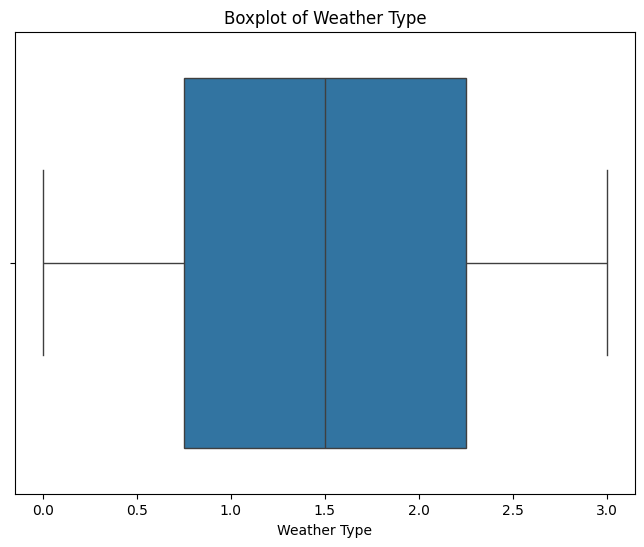

In [19]:
#menampilkan data outlier
for column in cuaca.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=cuaca[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


Berdasarkan boxplot diatas, ada 4 fitur yang memiliki outlier yakni fitur `Temperature`, `Wind Speed`, `Athmospheric Pressure` dan `Visibility (km)`

Outlier perlu dihapus untuk mendapatkan model yang bagus


In [20]:
# Pilih yang numerik saja
numeric_cuaca = cuaca.select_dtypes(include=np.number)

Q1 = numeric_cuaca.quantile(0.25)
Q3 = numeric_cuaca.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cuaca = cuaca[~((numeric_cuaca < lower_bound) | (numeric_cuaca > upper_bound)).any(axis=1)]

Outlier telah dihapus

In [21]:
cuaca.shape

(11689, 11)

Jumlah data sekarang menjadi 11689 dari 13200 data

## Hapus Kolom dengan Korelasi Terendah

bagian ini adalah proses penghapusan fitur-fitur yang memiliki korelasi rendah terhadap variabel target dari dataset. Langkah ini diambil berdasarkan asumsi bahwa fitur dengan korelasi rendah tidak memberikan kontribusi signifikan terhadap prediksi yang dibuat oleh model.

In [22]:
# Ada beberapa yang tidak memilik korelasi dengan Weather Type, maka dihilangkan
cuaca.drop(['Temperature', 'Atmospheric Pressure','Visibility (km)'], inplace=True, axis=1)
cuaca.head()

<ipython-input-22-0e536a417e51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuaca.drop(['Temperature', 'Atmospheric Pressure','Visibility (km)'], inplace=True, axis=1)


,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Location,Weather Type
0,73,9.5,82.0,partly cloudy,2,Winter,inland,1
1,96,8.5,71.0,partly cloudy,7,Spring,inland,0
2,64,7.0,16.0,clear,5,Spring,mountain,3
3,83,1.5,82.0,clear,7,Spring,coastal,3
4,74,17.0,66.0,overcast,1,Winter,mountain,1


In [23]:
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11689 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Humidity           11689 non-null  int64  
 1   Wind Speed         11689 non-null  float64
 2   Precipitation (%)  11689 non-null  float64
 3   Cloud Cover        11689 non-null  object 
 4   UV Index           11689 non-null  int64  
 5   Season             11689 non-null  object 
 6   Location           11689 non-null  object 
 7   Weather Type       11689 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 821.9+ KB


Penghapusan fitur `Temperature` , `Atmospheric Pressure` dan `Visibilty (km)` karena memiliki nilai korelasi yang rendah. Berdasarkan data terbaru, tersisa 8 kolom yakni 3 kategorik dan 5 numerik

## Encoding FItur Kategori

Encoding fitu kategori adalah teknik yang umum dilakukan adalah teknik one-hot-encoding. Library scikit-learn menyediakan fungsi ini untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili variabel kategori. Kita memiliki tiga variabel kategori dalam dataset kita, yaitu `Cloud Cover`, `Season`, dan `Location`.

In [24]:
cuaca = pd.concat([cuaca, pd.get_dummies(cuaca['Cloud Cover'], prefix='Cloud Cover')],axis=1)
cuaca = pd.concat([cuaca, pd.get_dummies(cuaca['Season'], prefix='Season')],axis=1)
cuaca = pd.concat([cuaca, pd.get_dummies(cuaca['Location'], prefix='Location')],axis=1)
cuaca.drop(['Cloud Cover','Season','Location'], axis=1, inplace=True)
cuaca.head()

,Humidity,Wind Speed,Precipitation (%),UV Index,Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,73,9.5,82.0,2,1,False,False,False,True,False,False,False,True,False,True,False
1,96,8.5,71.0,7,0,False,False,False,True,False,True,False,False,False,True,False
2,64,7.0,16.0,5,3,True,False,False,False,False,True,False,False,False,False,True
3,83,1.5,82.0,7,3,True,False,False,False,False,True,False,False,True,False,False
4,74,17.0,66.0,1,1,False,False,True,False,False,False,False,True,False,False,True


## Train-Test-Split

Train-Test-Split adalah metode untuk membagi dataset menjadi data latih (train) dan data uji (test). Biasanya data akan dibagi dengan proporsi tertentu. Dalam kasus ini saya akan membagi data menjadi 90:10 dimana 90% untuk training dan 10% untuk testing

In [25]:
# Membagi 90:10 (10% untuk data uji/test)
X = cuaca.drop(['Weather Type'],axis =1)
y = cuaca['Weather Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [26]:
# cek jumlah sampel
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 11689
Total # of sample in train dataset: 10520
Total # of sample in test dataset: 1169


Berdasarkan output diatas kita telah sukses melakukan proses Train-Test-Split, terlihat bahwa:
- Dataset train memiliki 10520 data
- Dataset test memiliki 1169 data

## Standarisasi

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn.

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Pada kasus ini kita hanya akan melakukan standarisai pada data latih, kemudian pada tahap evaluasi kita akan melakukan standarisasi pada data uji.

In [28]:
# Standarisasi data latih (train) dengan StandardCaler (utk numerik)
numerical_features = ['Humidity', 'Wind Speed', 'Precipitation (%)', 'UV Index']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Humidity,Wind Speed,Precipitation (%),UV Index
5908,-0.795473,-1.373182,-1.463063,0.658528
2175,1.007657,0.315739,0.531440,-0.728680
621,-0.589401,-0.306495,-1.120258,-0.451238
2363,1.059175,-0.662057,1.092394,2.045736
3887,-1.671279,-1.106510,-1.182586,0.381087


In [29]:
# mengecek nilai mean dan standar deviasi pada setelah proses standarisasi
X_train[numerical_features].describe().round(4)

,Humidity,Wind Speed,Precipitation (%),UV Index
count,10520.0000,10520.0000,10520.0000,10520.0000
mean,0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-2.5471,-1.6399,-1.6189,-1.0061
25%,-0.5379,-0.7509,-1.0579,-0.7287
50%,0.0288,-0.1287,0.1263,-0.4512
75%,0.7501,0.7602,0.9054,0.6585
max,2.0380,2.9825,1.7780,2.8781


Seperti yang disebutkan sebelumnya, proses ini akan mengubah nilai rata-rata (mean) menjadi 0 dan standar deviasi menjadi 1.

# Model Deployment

Pada tahap permodelan ini saya akan menggunakan 3 model yang berbeda, berikut ini adalah ketiga algoritma tersebut:
1. K-Nearest Neighbor (KNN)
  - Kelebihan
    - Sederhana dan mudah diimplementasikan
    - Non-parametrik
    - Fleksibel
  - Kekurangan
    - Lambat pada data besar
    - Sensitif terhadap fitur skala
    - Rentan terhadap outlier

2. Random Forest (RF)
  - Kelebihan
    - Akurasi tinggi
    - Resisten terhadap overfitting
    - Dapat menangani data yang hilang dan fitur penting
  - Kekurangan
    - Kurang interpretatif
    - Lambat dalam prediksi

3. Boosting Algorithm
  - Kelebihan
    - Akurasi sangat tinggi
    - Bagus untuk data tidak seimbang
    - Mengurangi bias
  - Kekurangan
    - Lebih rentan terhadap overfitting
    - Waktu pelatihan yang lama
    - Memerlukan tuning parameter

 Sebelum kita mulai proses modellingnya, mari siapkan data frame untuk analisis ketiga model tersebut lebih dahulu

In [30]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Pada tahap ini kita hanya melatih data training dan menyimpan data testing dari semua model untuk tahap evaluasi yang akan dibahas di Modul Evaluasi Model

## Model K-Nearest Neighbor (K-NN)


In [31]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

pada tahapan ini kita akan melatih data dengan KNN, kita menggunakan `n_neighbors`= 10 tetangga dan metric Euclidean untuk mengukur jarak antara titik.

## Model Random Forest

In [32]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Berikut adalah parameter-parameter yang digunakan:

- `n_estimator`: jumlah trees (pohon) di forest. Di sini kita set `n_estimator`=50.
- `max_depth`: ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan. Di sini kita set `max_depth`=16.
- `random_state`: digunakan untuk mengontrol random number generator yang digunakan. Di sini kita set `random_state`=55.
- `n_jobs`:  komponen untuk mengontrol thread atau proses yang berjalan secara paralel.  Di sini kita set `n_job`s=-1 artinya semua proses berjalan secara paralel.

## Model Boosting Algorithm

In [33]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

kita akan menggunakan metode adaptive boosting. Salah satu metode adaptive boosting yang terkenal adalah AdaBoost.

Berikut merupakan parameter-parameter yang digunakan pada potongan kode di atas.

- `learning_rate`: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
- `random_state`: digunakan untuk mengontrol random number generator yang digunakan.

# Evaluasi Model

Pada proses evaluasi kita akan menggunakan metrik MSE atau Mean Squared Error yang akan menghitung jumlah selisih kuadrat rata-rata nilai yang sebenarnya dengan nilai prediksi.

Namun, sebelum menghitung nilai MSE dalam model, kita perlu melakukan proses scaling fitur numerik pada data uji

In [34]:
# Proses Scalling
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-34-84b22210d436>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.007657    0.08033283  0.23488686 ...  0.95613899 -0.22877522
  1.007657  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
<ipython-input-34-84b22210d436>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.72867967  0.38108654 -1.00612122 ... -0.17379656 -1.00612122
 -0.45123811]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


Proses scaling diatas dilakukan terhadap data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.

Selanjutnya adalah melakukan evaluasi pada ketiga model dengan metrik MSE.

In [35]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.00015,0.00019
RF,0.000032,0.000131
Boosting,0.000225,0.000236


(array([0.0e+00, 5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04]),
 [Text(0.0, 0, '0.00000'),
  Text(5e-05, 0, '0.00005'),
  Text(0.0001, 0, '0.00010'),
  Text(0.00015000000000000001, 0, '0.00015'),
  Text(0.0002, 0, '0.00020'),
  Text(0.00025, 0, '0.00025')])

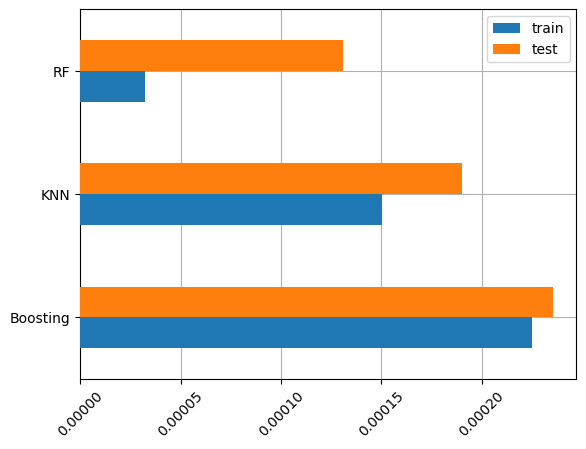

In [36]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
plt.xticks(rotation=45)

Selanjutnya kita akan melihat nilai akurasi di tiap model

In [37]:
# melihat nilai akurasi dari tiap model
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung akurasi masing-masing algoritma pada data test
for name, model in model_dict.items():
    y_pred = model.predict(X_test)
    # Konversi prediksi menjadi kelas (bulatkan ke bilangan bulat terdekat)
    y_pred_class = np.round(y_pred).astype(int)
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f"Akurasi {name}: {accuracy:.4f}")


Akurasi KNN: 0.8717
Akurasi RF: 0.9213
Akurasi Boosting: 0.6878


Berdasarkan visualisasi dan nilai akurasi pada ketiga model. Kita mendapatkan nilai tertinggi pada `Random Forest` dengan akurasi 92.13%.

Selanjutnya kita uji prediksinya menggunakan beberapa nilai dalam data

In [38]:
# Uji data
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)


,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
7259,2,1.9,1.9,1.5


Berdasarkan prediksinya juga, `Random forest` memiliki hasil prediksi terbaik